# Pareto Analysis: Profit by Sub-Category

Pareto analysis is used to identify the small portion of causes that contribute to the majority of the results. In this case, we evaluate product sub-categories based on their total profit.

The chart displays the total profit of each sub-category as blue bars, along with a red line representing the cumulative percentage contribution.

The horizontal line at 80 percent indicates the threshold based on the Pareto Principle (80/20 rule), which suggests that approximately 20 percent of the causes (sub-categories) generate 80 percent of the results (profit)


In [18]:
import pandas as pd

# Load pickle
df = pd.read_pickle("cleaned_superstore.pkl")

# print data (checking)
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,YearMonth
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# profit berdasarkan Sub-Category
pareto_df = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).reset_index()

# presentase profit
pareto_df["Percent"] = 100 * pareto_df["Profit"] / pareto_df["Profit"].sum()
pareto_df["Cumulative"] = pareto_df["Percent"].cumsum()

print(pareto_df)

   Sub-Category      Profit    Percent  Cumulative
0       Copiers  55617.8249  19.419834   19.419834
1        Phones  44515.7306  15.543364   34.963197
2   Accessories  41936.6357  14.642832   49.606030
3         Paper  34053.5693  11.890336   61.496366
4       Binders  30221.7633  10.552401   72.048767
5        Chairs  26590.1663   9.284372   81.333140
6       Storage  21278.8264   7.429835   88.762975
7    Appliances  18138.0054   6.333168   95.096143
8   Furnishings  13059.1436   4.559804   99.655947
9     Envelopes   6964.1767   2.431651  102.087599
10          Art   6527.7870   2.279279  104.366878
11       Labels   5546.2540   1.936561  106.303439
12     Machines   3384.7569   1.181841  107.485280
13    Fasteners    949.5182   0.331539  107.816819
14     Supplies  -1189.0995  -0.415193  107.401626
15    Bookcases  -3472.5560  -1.212497  106.189129
16       Tables -17725.4811  -6.189129  100.000000


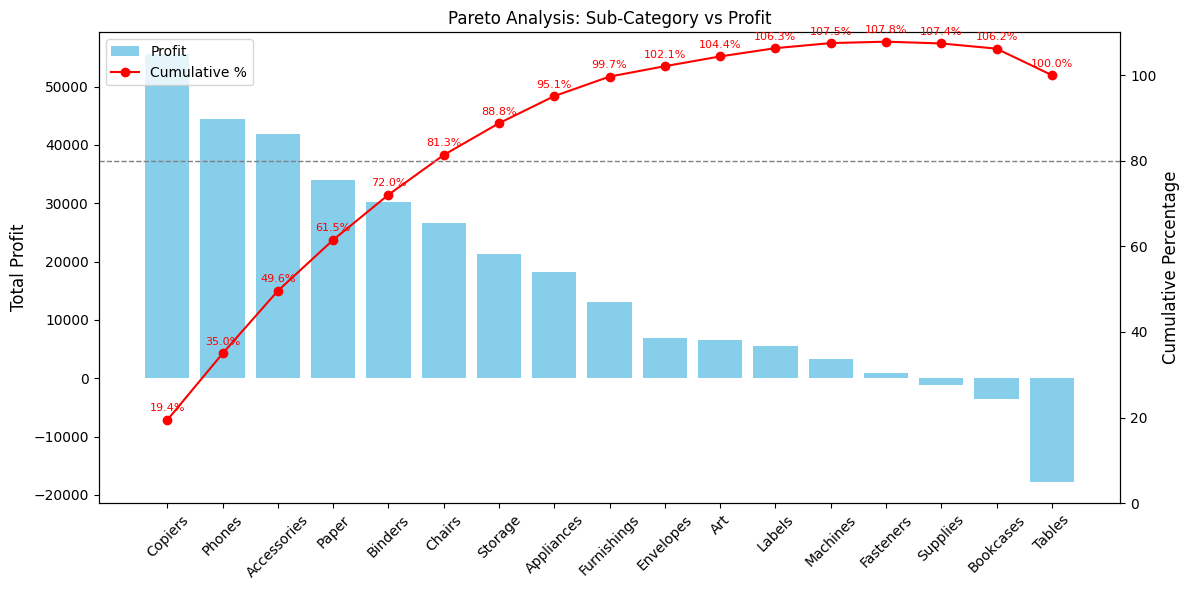

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot diagram Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart untuk profit
bars = ax1.bar(pareto_df["Sub-Category"], pareto_df["Profit"], color="skyblue", label="Profit")
ax1.set_ylabel("Total Profit", fontsize=12)
ax1.tick_params(axis="x", rotation=45)

# Line chart untuk kumulatif
ax2 = ax1.twinx()
line, = ax2.plot(pareto_df["Sub-Category"], pareto_df["Cumulative"], color="red", marker="o", label="Cumulative %")
ax2.set_ylabel("Cumulative Percentage", fontsize=12)

#  garis horizontal 80%
ax2.axhline(y=80, color='gray', linestyle='--', linewidth=1)

# margin batas atas agar garis tak mentok
ax2.set_ylim(0, 110)

# titik nilai kumulatif sebagai label
for i, val in enumerate(pareto_df["Cumulative"]):
    ax2.text(i, val + 2, f"{val:.1f}%", ha='center', color='red', fontsize=8)

# Legend gabungan
lines_labels = [bars, line]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc="upper left")

# Judul
plt.title("Pareto Analysis: Sub-Category vs Profit")
plt.tight_layout()
plt.show()


# Pareto Analysis - Sub-Category vs Profit

## 1. Distribusi Profit
- Sub-kategori **Copiers**, **Phones**, dan **Accessories** memberikan kontribusi profit terbesar, dengan total kumulatif sekitar **61.5%** dari keseluruhan profit.
- Jika ditambahkan dengan **Paper** dan **Binders**, lima sub-kategori ini mencakup lebih dari **80%** kontribusi total profit.

## 2. Produk A-Class (80% Kontribusi Profit)
Berdasarkan prinsip Pareto (80/20), produk-produk berikut tergolong A-Class dan sebaiknya menjadi prioritas dalam strategi bisnis:
- Copiers  
- Phones  
- Accessories  
- Paper  
- Binders

## 3. Sub-kategori Merugi
Beberapa sub-kategori tercatat memberikan profit negatif, yang berarti mereka justru menyebabkan kerugian:
- **Tables** adalah yang paling merugi
- Sub-kategori lain seperti **Bookcases**, **Supplies**, dan **Fasteners** juga mencatatkan kerugian

## 4. Imbal Hasil vs Risiko
- Sub-kategori A-Class layak dijadikan fokus dalam promosi, pemasaran, dan pengelolaan stok.
- Sub-kategori dengan profit negatif perlu dilakukan evaluasi mendalam terhadap:
  - Struktur biaya (biaya pengiriman, diskon besar, atau pengembalian produk)
  - Strategi harga
  - Efisiensi rantai pasok dan pemasok

---

## Rekomendasi Strategis
- Fokuskan sumber daya pada sub-kategori A-Class untuk meningkatkan profitabilitas.
- Lakukan audit terhadap sub-kategori merugi untuk menemukan penyebab utama kerugian.
- Gunakan hasil analisis ini untuk menyusun strategi segmentasi produk:  
  - A (prioritas utama)  
  - B (kontribusi menengah)  
  - C (perlu evaluasi/optimalisasi)


In [21]:
# Instalasi tabulate jika belum ada
try:
      import tabulate
except ImportError:
    import sys
    !{sys.executable} -m pip install tabulate

import pandas as pd

# Hitung total sales dan profit per sub-kategori
margin_df = df.groupby("Sub-Category")[["Sales", "Profit"]].sum()
margin_df["Profit Margin (%)"] = 100 * margin_df["Profit"] / margin_df["Sales"]
margin_df = margin_df.sort_values("Profit Margin (%)", ascending=False).reset_index()

# Tampilkan seluruh tabel
print(margin_df.to_markdown(index=False, floatfmt=".2f"))

# Filter untuk Copiers, Chairs, dan Tables
highlight = margin_df[margin_df["Sub-Category"].isin(["Copiers", "Chairs", "Tables"])]

# Tampilkan tabel highlight
print("\n### Comparison: Copiers vs Chairs vs Tables\n")
print(highlight.to_markdown(index=False, floatfmt=".2f"))


| Sub-Category   |     Sales |    Profit |   Profit Margin (%) |
|:---------------|----------:|----------:|--------------------:|
| Labels         |  12486.31 |   5546.25 |               44.42 |
| Paper          |  78479.21 |  34053.57 |               43.39 |
| Envelopes      |  16476.40 |   6964.18 |               42.27 |
| Copiers        | 149528.03 |  55617.82 |               37.20 |
| Fasteners      |   3024.28 |    949.52 |               31.40 |
| Accessories    | 167380.32 |  41936.64 |               25.05 |
| Art            |  27118.79 |   6527.79 |               24.07 |
| Appliances     | 107532.16 |  18138.01 |               16.87 |
| Binders        | 203412.73 |  30221.76 |               14.86 |
| Furnishings    |  91705.16 |  13059.14 |               14.24 |
| Phones         | 330007.05 |  44515.73 |               13.49 |
| Storage        | 223843.61 |  21278.83 |                9.51 |
| Chairs         | 328449.10 |  26590.17 |                8.10 |
| Machines       | 189238

In [22]:
# Hitung harga jual per unit dan harga modal (estimasi)
df["Unit Selling Price"] = df["Sales"] / df["Quantity"]
df["Unit Cost Price (Estimated)"] = (df["Sales"] - df["Profit"]) / df["Quantity"]

# Agregasi rata-rata untuk sub-kategori pilihan
selected = ["Copiers", "Chairs", "Tables"]
pricing_df = df[df["Sub-Category"].isin(selected)].groupby("Sub-Category")[["Unit Selling Price", "Unit Cost Price (Estimated)"]].mean().reset_index()

# Hitung margin per unit sebagai selisih harga jual dan modal
pricing_df["Unit Profit"] = pricing_df["Unit Selling Price"] - pricing_df["Unit Cost Price (Estimated)"]

# Urutkan
pricing_df = pricing_df.sort_values("Unit Selling Price", ascending=False)

# Tampilkan dalam format markdown
from IPython.display import Markdown
Markdown(pricing_df.to_markdown(index=False, floatfmt=".2f"))


| Sub-Category   |   Unit Selling Price |   Unit Cost Price (Estimated) |   Unit Profit |
|:---------------|---------------------:|------------------------------:|--------------:|
| Copiers        |               601.02 |                        381.81 |        219.21 |
| Tables         |               165.09 |                        180.66 |        -15.57 |
| Chairs         |               138.80 |                        128.60 |         10.20 |

## Kesimpulan Analisis Margin Produk

Berdasarkan analisis margin dari sub-kategori **Copiers**, **Chairs**, dan **Tables**, diperoleh temuan sebagai berikut:

- **Copiers** memiliki rata-rata harga jual per unit paling tinggi serta margin keuntungan tertinggi, menjadikannya produk dengan kontribusi profit signifikan yang perlu difokuskan sebagai produk utama (Horngren et al., 2012).
- Sebaliknya, **Chairs** dan **Tables** memiliki margin keuntungan per unit yang relatif rendah, menunjukkan karakteristik sebagai produk dengan strategi volume tinggi dan efisiensi biaya (Kotler & Keller, 2016).
- Perbedaan ini mendukung pendekatan segmentasi produk berdasarkan margin, yaitu memaksimalkan promosi dan pelayanan untuk produk high-margin, serta mengefisiensikan proses dan biaya pada produk low-margin (Kaplan & Atkinson, 2015).

## Rekomendasi Strategis

- Fokuskan strategi pertumbuhan pada produk **Copiers** melalui peningkatan promosi, bundling, dan penargetan segmen pelanggan premium (Kotler & Keller, 2016).
- Optimalkan efisiensi operasional dan biaya logistik pada produk **Chairs** dan **Tables** untuk mempertahankan profitabilitas pada produk low-margin (Horngren et al., 2012).
- Gunakan pendekatan Pareto (80/20) untuk memprioritaskan produk berdasarkan kontribusi profit terbesar, guna alokasi sumber daya yang lebih efektif (Juran, 1974).

---

**Sumber Data:** Sample - Superstore Dataset  
**Referensi Teori:**  
- Horngren, C. T., Sundem, G. L., & Stratton, W. O. (2012). *Introduction to Management Accounting*.  
- Kotler, P., & Keller, K. L. (2016). *Marketing Management*.  
- Kaplan, R. S., & Atkinson, A. A. (2015). *Advanced Management Accounting*.  
- Juran, J. M. (1974). *Quality Control Handbook*.
